In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# reading dataset
data2022_load = "datasets/COBRA-2022.csv"

data2022 = pd.read_csv(data2022_load)
#data2022
data2022.shape

(21575, 17)

In [4]:
# drop NAs
data2022 = data2022.dropna(how='any')
data2022.shape
#data2022.shape[0]
#type(data2022)

(20106, 17)

In [5]:
# working on all OR chunk of data
r=input("how many rows do you want to keep?")
if r == "all":
    data = data2022
else:
    r=int(r)
    #data = data2022.drop(data2022.index[r:data2022.shape[0]], inplace=True)
    data =data2022.drop(data2022.index[r:])

data.shape

how many rows do you want to keep?all


(20106, 17)

In [6]:
# add column for furthur analysis
data["zipcode"] = ""
data["time_range"] = ""
data["pop"] = ""
data.shape
#data

(20106, 20)

In [7]:
#reset index beause of removed rows
data = data.reset_index()
#data

In [8]:
# grab the zipcode from address
for i in range(0,data.shape[0]):
    m = data["location"][i].split()
    #print(m)
    data["zipcode"][i] = m[-3] 
#data  

C:\Users\shams_a\AppData\Local\Temp\ipykernel_16592\1638013036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["zipcode"][i] = m[-3]


In [9]:
# check data make sure everything is matched with Atlanta zipcdes
drop_row = []
for i in range(0,data.shape[0]):
    if data["zipcode"][i][0] != '3':
        data["zipcode"][i] = " "
        drop_row.append(i)
drop_row

C:\Users\shams_a\AppData\Local\Temp\ipykernel_16592\154305135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["zipcode"][i] = " "


[2627, 5469, 11597, 16197, 17118]

In [10]:
# reseting index because if dropped rows
data1 = data.drop(drop_row)
data_new = data1.reset_index()


In [11]:
# group by zipcode
data_new.groupby("zipcode").count()["offense_id"]

zipcode
30032       1
30303    1055
30305     648
30306     605
30307     710
30308    1178
30309    1155
30310    1575
30311     927
30312    1330
30313     508
30314    1061
30315    1699
30316     765
30317     318
30318    2926
30319      46
30324     959
30326     660
30327     122
30331    1163
30336       6
30342     132
30344       8
30354     430
30361       1
30363     108
30380       1
31126       4
Name: offense_id, dtype: int64

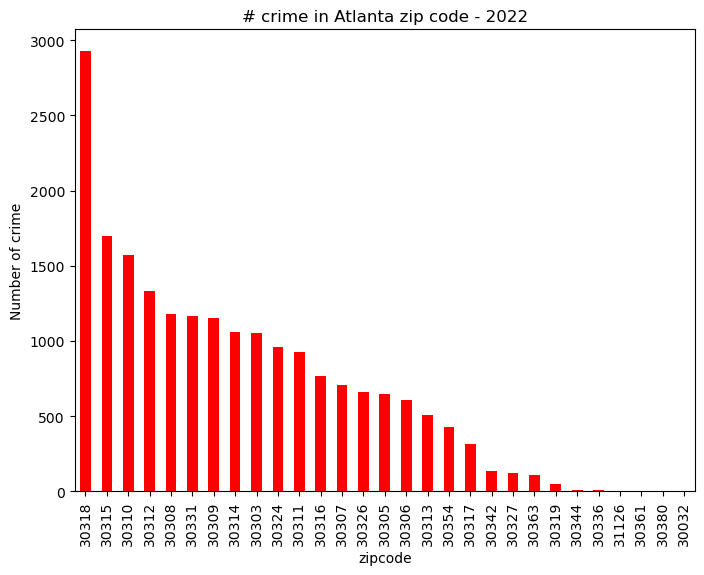

In [12]:
# bar chart  - # crime
y = data_new.groupby(["zipcode"]).count().sort_values(by="offense_id", ascending=False)["offense_id"]
#x1 = clean_data["Drug Regimen"].unique()

figure = y.plot(kind="bar", facecolor="red", figsize=(8,6),
                                title="# crime in Atlanta zip code - 2022",
                                xlabel="zipcode",
                                ylabel="Number of crime")
plt.savefig("nocrime_barchart.png", bbox_inches="tight")

In [13]:
filter_zip = data_new["zipcode"].unique()
filter_zip

array(['30316', '30331', '30311', '30318', '30310', '30308', '30324',
       '30312', '30315', '30309', '30314', '30303', '30326', '30305',
       '30307', '30306', '30313', '30327', '30344', '30354', '30363',
       '30317', '30319', '30342', '30336', '31126', '30361', '30380',
       '30032'], dtype=object)

In [14]:
# importing the pop dataset
pop_load = "datasets/2010pop.csv"

pop = pd.read_csv(pop_load)

drop_row2 = []
for i in range(0,pop.shape[0]):
    if pop["Row Labels"][i] not in filter_zip:
        pop["Row Labels"][i] = " "
        drop_row2.append(i)
#print(drop_row2)
pop1 = pop.drop(drop_row2)
pop_new = pop1.reset_index()
#pop_new

C:\Users\shams_a\AppData\Local\Temp\ipykernel_16592\1080291813.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop["Row Labels"][i] = " "


In [15]:
# add population to dataset
for i in range(0,data_new.shape[0]):
    for j in range(0, pop_new.shape[0]):
        if data_new["zipcode"][i] == pop_new["Row Labels"][j]:
            data_new["pop"][i] = pop_new["Sum of population"][j]
#data_new

C:\Users\shams_a\AppData\Local\Temp\ipykernel_16592\1638586899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["pop"][i] = pop_new["Sum of population"][j]


In [16]:
# add sum of crimes for everyzipcode
sum_crime= pd.DataFrame (data_new.groupby("zipcode").count()["offense_id"])
sum_crime.reset_index(inplace=True)

data_new["total_crime"]= ""

for i in range(0,data_new.shape[0]):
    for j in range(0, sum_crime.shape[0]):
        if data_new["zipcode"][i] == sum_crime["zipcode"][j]:
            data_new["total_crime"][i] = sum_crime["offense_id"][j]
#data_new

C:\Users\shams_a\AppData\Local\Temp\ipykernel_16592\730082619.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["total_crime"][i] = sum_crime["offense_id"][j]


In [17]:
# creat density column
data_new['pop'] = pd.to_numeric(data_new['pop'])
data_new['total_crime'] = pd.to_numeric(data_new['total_crime'])
data_new["crime/100kpop"] = 1000 * data_new['total_crime'] / data_new['pop']

#data_new

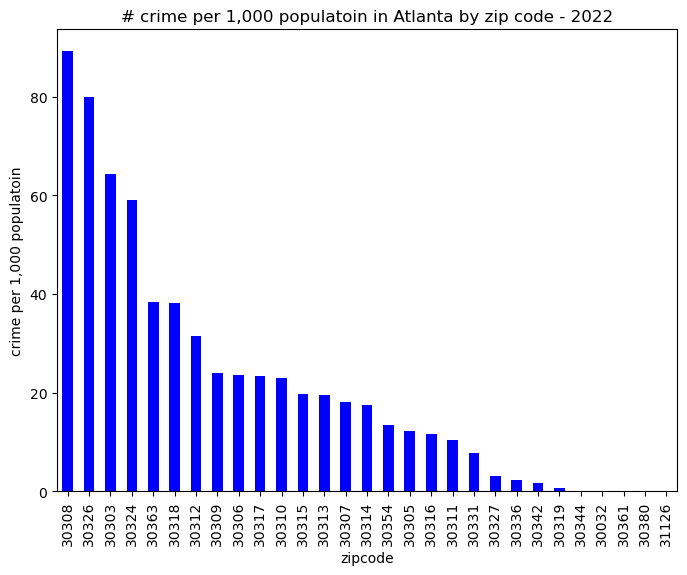

In [18]:
# bar chart based on density 
y1 = data_new.groupby(["zipcode"]).max().sort_values(by="crime/100kpop", ascending=False)["crime/100kpop"]


figure1 = y1.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="# crime per 1,000 populatoin in Atlanta by zip code - 2022",
                                xlabel="zipcode",
                                ylabel="crime per 1,000 populatoin")

plt.savefig("crime density_barchart.png", bbox_inches="tight")

In [19]:
# define time range that any crime happened
for i in range(0,data_new.shape[0]):
    if (data_new["occur_time"][i] >= "00:00") & (data_new["occur_time"][i] < "06:00"):
        data_new["time_range"][i] = "night"
    elif (data_new["occur_time"][i] >= "06:00") & (data_new["occur_time"][i] < "12:00"):
        data_new["time_range"][i] = "morning"
    elif (data_new["occur_time"][i] >= "12:00") & (data_new["occur_time"][i] < "18:00"):
        data_new["time_range"][i] = "afternoon"
    else:
        data_new["time_range"][i] = "evening"                                       

data_new  

C:\Users\shams_a\AppData\Local\Temp\ipykernel_16592\1780917639.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["time_range"][i] = "evening"
C:\Users\shams_a\AppData\Local\Temp\ipykernel_16592\1780917639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["time_range"][i] = "morning"
C:\Users\shams_a\AppData\Local\Temp\ipykernel_16592\1780917639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["time_ra

level_0  index  offense_id    rpt_date  occur_date  occur_day  \
0            0      0    22011609   7/20/2022   7/20/2022  Wednesday   
1            1      1    22254073   9/11/2022   9/11/2022     Sunday   
2            2      2   202800283   6/14/2022   10/6/2020    Tuesday   
3            3      3   203140048   2/21/2022   11/9/2020     Monday   
4            4      4   203250206   4/15/2022  11/20/2020     Friday   
...        ...    ...         ...         ...         ...        ...   
20096    20101  21568   223641776  12/30/2022  12/30/2022     Friday   
20097    20102  21569   223641783  12/30/2022  12/30/2022     Friday   
20098    20103  21570   223641886  12/30/2022  12/30/2022     Friday   
20099    20104  21571   223641980  12/30/2022  12/30/2022     Friday   
20100    20105  21574   951585288    1/6/2022    6/7/1995  Wednesday   

       occur_day_num occur_time   poss_date poss_time  ...  \
0                4.0      18:30   7/20/2022     19:00  ...   
1                1.0      11:15   9/11/2022     11:45  ...   
2                3.0      05:21   10/6/2020     05:40  ...   
3                2.0      00:32   11/9/2020     01:49  ...   
4                6.0      01:40  11/20/2020     01:45  ...   
...              ...        ...         ...       ...  ...   
20096            6.0      19:08  12/30/2022     19:09  ...   
20097            6.0      14:51  12/30/2022     16:40  ...   
20098            6.0      17:00  12/30/2022     22:42  ...   
20099            6.0      21:03  12/30/2022     21:37  ...   
20100            4.0      09:00    6/7/1995     09:05  ...   

                UC2_Literal            neighborhood npu        lat       long  \
0       LARCENY-NON VEHICLE  Custer/McDonough/Guice   W  33.716073 -84.353217   
1      LARCENY-FROM VEHICLE            Reynoldstown   N  33.746335 -84.361753   
2      LARCENY-FROM VEHICLE                Fairburn   P  33.690551 -84.520970   
3               AGG ASSAULT              Adams Park   R  33.706526 -84.458000   
4       LARCENY-NON VEHICLE             Center Hill   J  33.776168 -84.472729   
...                     ...                     ...  ..        ...        ...   
20096   LARCENY-NON VEHICLE                 Midtown   E  33.775198 -84.365840   
20097   LARCENY-NON VEHICLE          Mechanicsville   V  33.740863 -84.404238   
20098            AUTO THEFT               Vine City   L  33.755968 -84.416293   
20099  LARCENY-FROM VEHICLE              Inman Park   N  33.761914 -84.360387   
20100              HOMICIDE               Southwest   R  33.700808 -84.483531   

      zipcode time_range       pop  total_crime crime/100kpop  
0       30316    evening   65881.0          765     11.611846  
1       30316    morning   65881.0          765     11.611846  
2       30331      night  148391.0         1163      7.837403  
3       30311      night   88312.0          927     10.496875  
4       30318      night   76746.0         2926     38.125766  
...       ...        ...       ...          ...           ...  
20096   30308    evening   13210.0         1178     89.174868  
20097   30312  afternoon   42243.0         1330     31.484506  
20098   30314  afternoon   60526.0         1061     17.529657  
20099   30307    evening   39047.0          710     18.183215  
20100   30311    morning   88312.0          927     10.496875  

[20101 rows x 24 columns]

In [20]:
export_1 = data_new.groupby("zipcode").count()["total_crime"]
export_1
export_1.to_csv('zip_vs_crim.csv')

In [21]:
export_2 = data_new.groupby("zipcode").max()["crime/100kpop"]
export_2
export_2.to_csv('zip_vs_crim_density.csv')

In [23]:
###### by time range

In [46]:
z = data_new.groupby(["zipcode","time_range"]).count()["total_crime"]
z = z.reset_index()
#z['zipcode'] = pd.to_numeric(z['zipcode'])
z

zipcode time_range  total_crime
0     30032    evening            1
1     30303  afternoon          288
2     30303    evening          384
3     30303    morning          173
4     30303      night          210
..      ...        ...          ...
101   30363      night           10
102   30380  afternoon            1
103   31126  afternoon            2
104   31126    evening            1
105   31126    morning            1

[106 rows x 3 columns]

In [52]:
data_time_range = pd.DataFrame()
#data_time_range["zipcode"]=z["zipcode"].unique()
data_time_range["morning"]=""
data_time_range["afternoon"]=""
data_time_range["evening"]=""
data_time_range["night"]=""

data_time_range

Empty DataFrame
Columns: [morning, afternoon, evening, night]
Index: []

In [54]:
for i in range ( 0, z.shape[0]):
    data_time_range.loc[f"{z['zipcode'] [i]}" , f"{z['time_range'] [i]}"] = z["total_crime"][i] 

data_time_range

morning afternoon evening night
30032     NaN       NaN       1   NaN
30303     173       288     384   210
30305      91       167     243   147
30306      84       158     272    91
30307      74       181     355   100
30308     217       325     406   230
30309     146       292     458   259
30310     303       583     452   237
30311     181       338     261   147
30312     178       362     519   271
30313      63       130     223    92
30314     197       331     317   216
30315     299       524     542   334
30316     128       239     284   114
30317      46       115     102    55
30318     500       890     963   573
30319       8        21       7    10
30324     157       273     331   198
30326      88       324     187    61
30327      47        44      23     8
30331     204       364     384   211
30336       1         3       1     1
30342      14        36      63    19
30344       2         2       3     1
30354      96       146     111    77
30361     NaN       NaN       1   NaN
30363      16        50      32    10
30380     NaN         1     NaN   NaN
31126       1         2       1   NaN

In [61]:
timerange_df = data_time_range. reset_index()
timerange_df.rename(columns = {'index':'zipcode'}, inplace = True)
timerange_df

zipcode morning afternoon evening night
0    30032     NaN       NaN       1   NaN
1    30303     173       288     384   210
2    30305      91       167     243   147
3    30306      84       158     272    91
4    30307      74       181     355   100
5    30308     217       325     406   230
6    30309     146       292     458   259
7    30310     303       583     452   237
8    30311     181       338     261   147
9    30312     178       362     519   271
10   30313      63       130     223    92
11   30314     197       331     317   216
12   30315     299       524     542   334
13   30316     128       239     284   114
14   30317      46       115     102    55
15   30318     500       890     963   573
16   30319       8        21       7    10
17   30324     157       273     331   198
18   30326      88       324     187    61
19   30327      47        44      23     8
20   30331     204       364     384   211
21   30336       1         3       1     1
22   30342      14        36      63    19
23   30344       2         2       3     1
24   30354      96       146     111    77
25   30361     NaN       NaN       1   NaN
26   30363      16        50      32    10
27   30380     NaN         1     NaN   NaN
28   31126       1         2       1   NaN

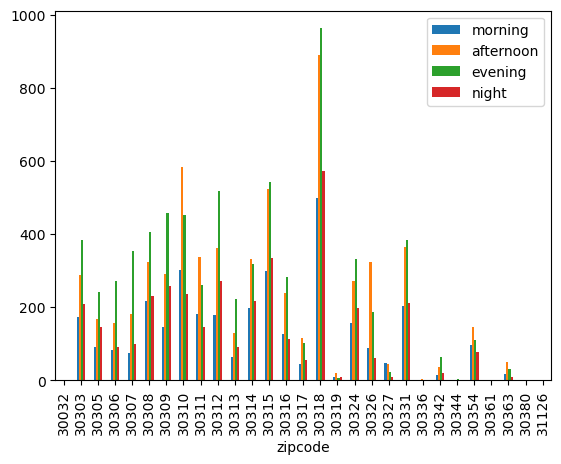

In [69]:
ax = timerange_df.plot.bar(x='zipcode', y=['morning', 'afternoon', 'evening', 'night'], rot=90)
plt.savefig("time_range.png", bbox_inches="tight")

In [ ]:
y = data_new.groupby(["zipcode"]).count().sort_values(by="offense_id", ascending=False)["offense_id"]
#x1 = clean_data["Drug Regimen"].unique()

figure = y.plot(kind="bar", facecolor="red", figsize=(8,6),
                                title="# crime in Atlanta zip code - 2022",
                                xlabel="zipcode",
                                ylabel="Number of crime")
plt.savefig("nocrime_barchart.png", bbox_inches="tight")